In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

load a trained CNN model

In [17]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

Based on the summary, we know that 
1. the first layer has 64 filters, which we can visualize.
2. the last layer produces a feature vector with a size of 4096, which we can try nearest neighbor and dimension reduction

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

make a prediction

In [5]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.applications.vgg16 import decode_predictions


img_path = './test_image/aeroplane/2008_000033.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
label = decode_predictions(features)

# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

airliner (51.20%)


first layer visualize

In [6]:
model.layers[1]

In [7]:
first_layer_weights = model.layers[1].get_weights()[0]
# fig, axes = plt.subplots(num_rows, num_columns, figsize=(8,8)

In [8]:
print(first_layer_weights.min(), first_layer_weights.max())
normalized_weights = (first_layer_weights - first_layer_weights.min()) / (first_layer_weights.max() - first_layer_weights.min())

-0.67140007 0.6085159


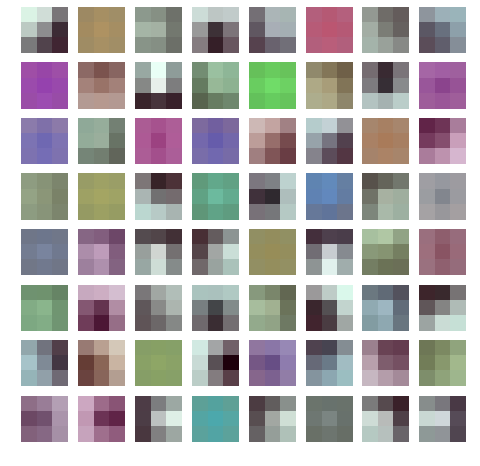

In [9]:
kernel_index = 0
num_rows = 8
num_columns = 8
fig, axes = plt.subplots(num_rows, num_columns, figsize=(8,8))
for row in range(num_rows):
    for column in range(num_columns):
        visual_kernel = normalized_weights[:,:,:,kernel_index].reshape(3,3,3)
        axes[row, column].imshow(visual_kernel)
        axes[row, column].axis('off')
        kernel_index += 1

extract feature vector

In [10]:
from keras.models import Model
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.applications.vgg16 import decode_predictions


img_path = './test_image/aeroplane/2008_000033.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

layer_name = "fc2"
feature_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)
feature_vector = feature_layer_model.predict(x)

In [11]:
layer_name = "fc2"
feature_layer_model = Model(inputs=model.input, outputs=model.get_layer(layer_name).output)

feature_vector_lst = []

from os import listdir
obj_types = "aeroplane,bus,car"
folder_path = "./test_image/"
for obj in obj_types.split(","):
    img_path_lst = listdir(folder_path + obj + "/")
    obj_vector_lst = []
    for img_path in img_path_lst:
        img_dir = folder_path + obj + "/" + img_path
        img = image.load_img(img_dir, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        feature_vector = feature_layer_model.predict(x)
        feature_vector_lst.append(feature_vector.reshape(4096))

In [12]:
X = np.array(feature_vector_lst)

In [13]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2).fit_transform(X)

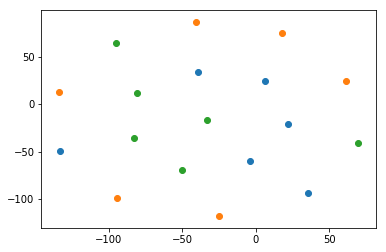

In [19]:
plt.scatter(X_embedded[:6,0], X_embedded[:6,1])
plt.scatter(X_embedded[6:12,0], X_embedded[6:12,1])
plt.scatter(X_embedded[12:18,0], X_embedded[12:18,1])